In [ ]:
pip install opencv-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

Training data = 60,000 Images
Test data = 10,000 Images
__________________________________________
Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [25]:
def plot_input_img(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title(Y_train[i])
  plt.show()

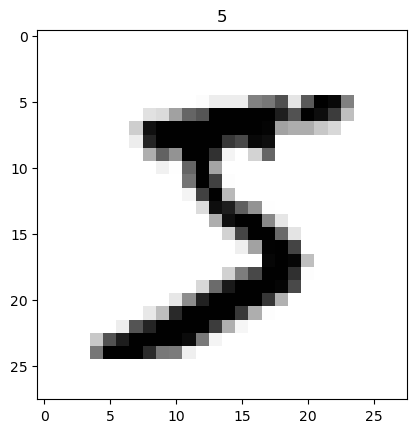

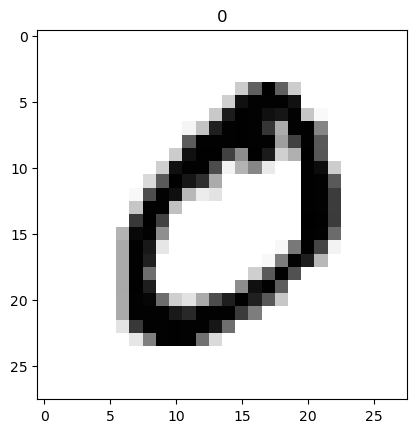

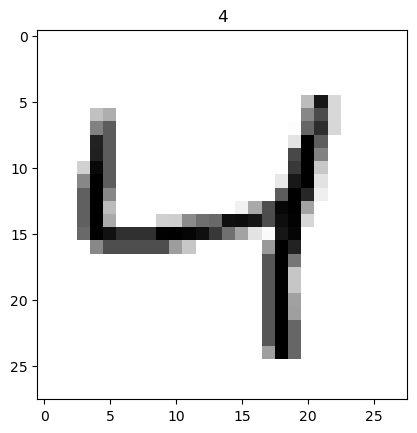

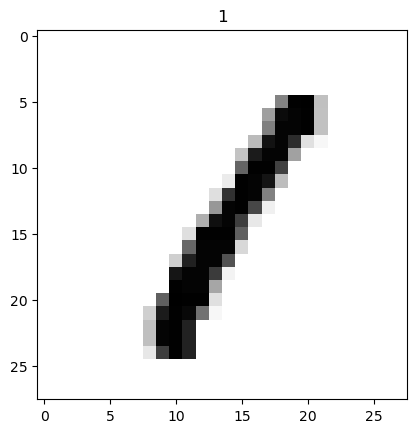

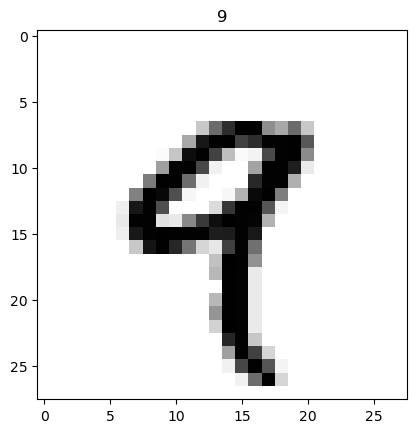

In [27]:
for i in range(5):
  plot_input_img(i)
  print("\n")


In [32]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [34]:
print(X_train[10].shape)

(28, 28)


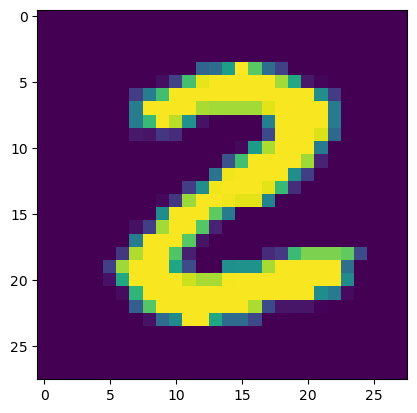

2


In [36]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Pre Process the images

In [41]:
#Pre Process the images

#Normalizing the image to [0,1] range
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

#Expand the dimensions of images
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [49]:
X_train.shape

(60000, 28, 28, 1)

In [47]:
Y_train.shape

(60000,)

In [53]:
# convert classes to one hot vectors
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

Building a Neural Network

In [60]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [84]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Import necessary callbacks from Keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping: stops training when the validation accuracy does not improve for a set number of epochs
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

# ModelCheckpoint: saves the model after every epoch if validation accuracy improves
mc = ModelCheckpoint("/content/sample_data/bestmodel.keras", monitor="val_accuracy", verbose=1, save_best_only=True)

# Combine callbacks into a list
cb = [es, mc]

**Model Training**

In [95]:
his = model.fit(X_train,Y_train,epochs=30,validation_split=0.3,callbacks=cb)

Epoch 1/30
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0401
Epoch 1: val_accuracy improved from -inf to 0.98472, saving model to /content/sample_data/bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9866 - loss: 0.0401 - val_accuracy: 0.9847 - val_loss: 0.0460
Epoch 2/30
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0280
Epoch 2: val_accuracy improved from 0.98472 to 0.98483, saving model to /content/sample_data/bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9899 - loss: 0.0280 - val_accuracy: 0.9848 - val_loss: 0.0458
Epoch 3/30
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9926 - loss: 0.0223
Epoch 3: val_accuracy improved from 0.98483 to 0.98489, saving model to /content/sample_data/bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9849 - val_loss: 0.0495
Epoch 4/30
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [128]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1611
0.9702000021934509


Plotting Graphs for Model Evaluation

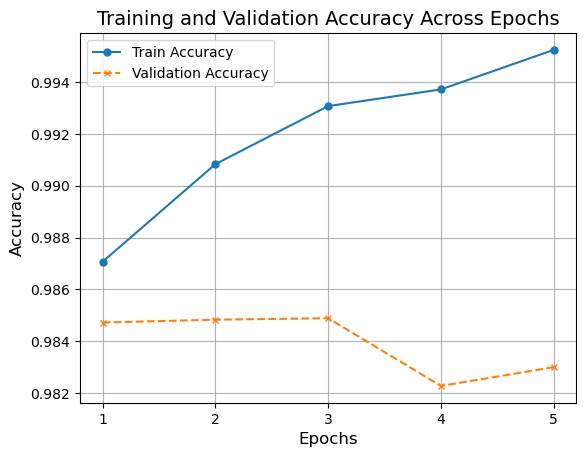

In [97]:
#Plot training and validation accuracy
epochs = list(range(1,len(his.history['accuracy']) + 1))
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']

plt.plot(epochs, acc, label='Train Accuracy',linestyle='-', marker='o', markersize=5)
plt.plot(epochs, val_acc, label='Validation Accuracy', linestyle='--', marker='x', markersize=5)

plt.title('Training and Validation Accuracy Across Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs, fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.legend(fontsize=10)
plt.show()

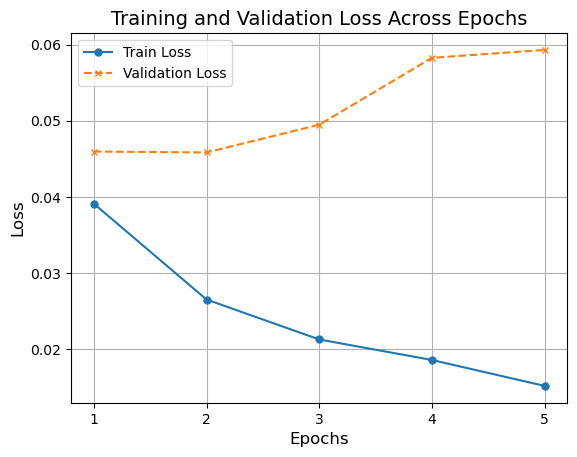

In [99]:
#Plot training and validation loss
epochs = list(range(1,len(his.history['accuracy']) + 1))
acc = his.history['loss']
val_acc = his.history['val_loss']

plt.plot(epochs, acc, label='Train Loss',linestyle='-', marker='o', markersize=5)
plt.plot(epochs, val_acc, label='Validation Loss', linestyle='--', marker='x', markersize=5)

plt.title('Training and Validation Loss Across Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(epochs, fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.legend(fontsize=10)
plt.show()

In [105]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)
y_val_classes=np.argmax(Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Confusion Matrix

In [111]:
#Compute confusion Matrix
conf_matrix=confusion_matrix(y_val_classes,y_pred_classes)
print("Confusion Matrix: ")
print(conf_matrix)

Confusion Matrix: 
tf.Tensor(
[[ 970    0    1    2    0    1    4    1    1    0]
 [   0 1122    3    1    0    2    2    1    4    0]
 [   3    2  997    6    3    1    8    7    5    0]
 [   2    2    8  963    0   19    0    8    5    3]
 [   2    0    4    0  950    1    7    9    1    8]
 [   2    1    1    9    2  866    6    1    3    1]
 [   3    2    2    1    2    2  946    0    0    0]
 [   1    3    8    2    1    1    1 1004    2    5]
 [   5    0    6    9    5   10    7    5  922    5]
 [   3    2    1    4   19    6    1   13    2  958]], shape=(10, 10), dtype=int32)


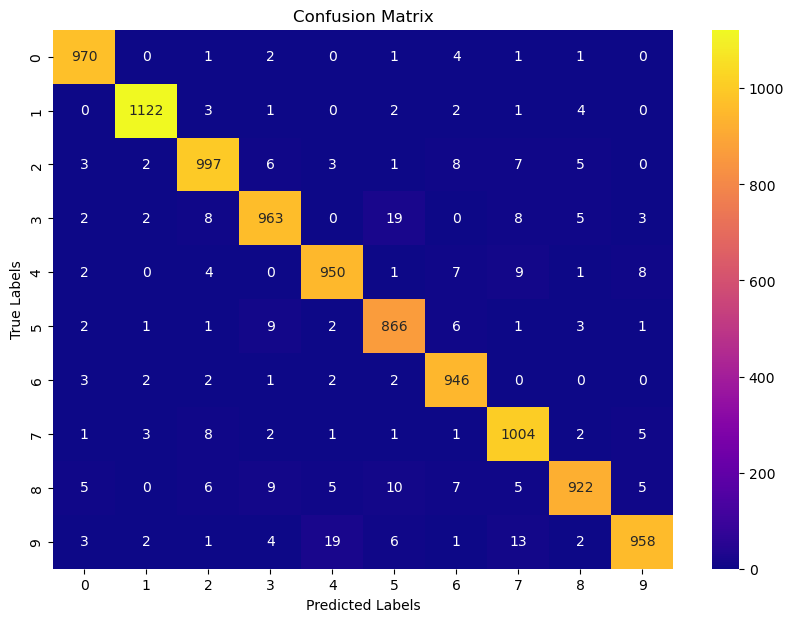

In [113]:
# Visualize confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='plasma',xticklabels=np.arange(10),yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Predict and display a test image

In [122]:
def multi_img(test_index):
  predicted_probs = model.predict(X_test[test_index:test_index + 1])
  predicted_class = np.argmax(predicted_probs)
  plt.imshow(X_test[test_index], cmap='binary')
  plt.title(f'Predicted: {predicted_class}, Actual: {np.argmax(Y_test[test_index])}')
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


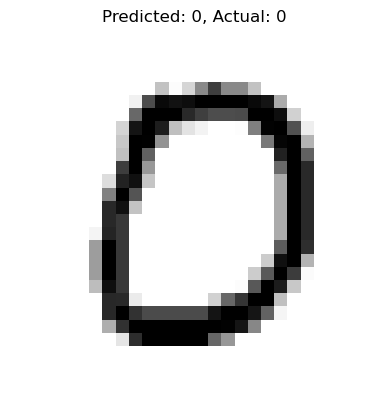

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


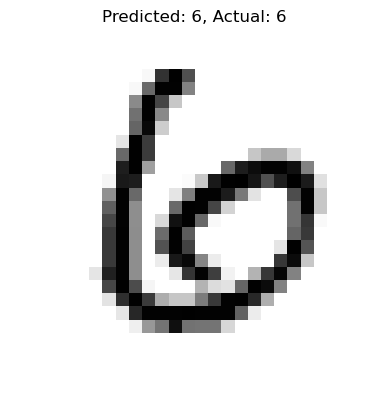

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


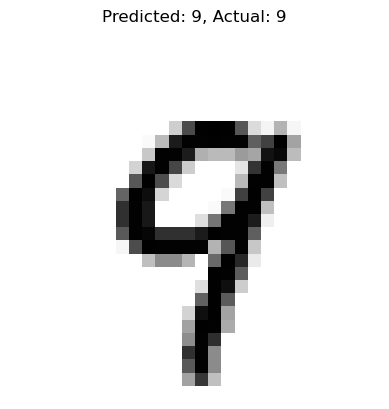

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


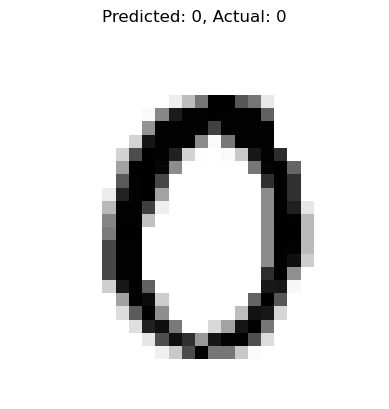

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


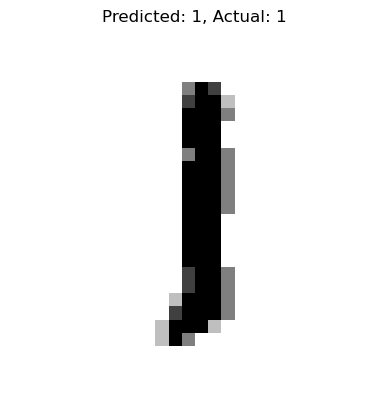

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


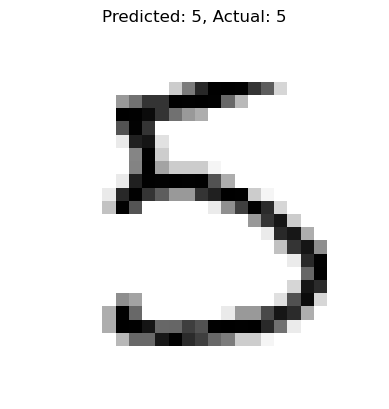

In [124]:
for i in range(10,16):
  multi_img(i)